In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import visualkeras

2024-09-27 13:47:34.186236: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 13:47:34.187696: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-27 13:47:34.195986: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-27 13:47:34.225157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 13:47:34.269498: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Розширення розмірності для згорткових шарів
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Розділення на тренувальний та валідаційний набори
val_size = 10000
x_val = x_train[-val_size:]
y_val = y_train[-val_size:]
x_train = x_train[:-val_size]
y_train = y_train[:-val_size]

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
def create_model_1():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_2():
    model = keras.Sequential([
        layers.Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (5, 5), activation='tanh'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
def train_model(model, epochs=10, batch_size=32):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=(x_val, y_val),
                        epochs=epochs, 
                        batch_size=batch_size)
    return history

def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_classification_report(model, x, y):
    y_pred = model.predict(x)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y, y_pred_classes, target_names=class_names))

def classify_random_samples(model, x, y, num_samples=20):
    indices = np.random.choice(len(x), num_samples, replace=False)
    x_samples = x[indices]
    y_samples = y[indices]
    
    y_pred = model.predict(x_samples)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            ax.imshow(x_samples[i].reshape(28, 28), cmap='gray')
            true_label = class_names[y_samples[i]]
            pred_label = class_names[y_pred_classes[i]]
            color = 'green' if true_label == pred_label else 'red'
            ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [6]:
model_1 = create_model_1()
history_1 = train_model(model_1)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-3/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7571 - loss: 0.6680 - val_accuracy: 0.8555 - val_loss: 0.3887
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8801 - loss: 0.3288 - val_accuracy: 0.8825 - val_loss: 0.3203
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8975 - loss: 0.2821 - val_accuracy: 0.8993 - val_loss: 0.2754
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9124 - loss: 0.2401 - val_accuracy: 0.8999 - val_loss: 0.2706
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9200 - loss: 0.2119 - val_accuracy: 0.9035 - val_loss: 0.2780
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9275 - loss: 0.1962 - val_accuracy: 0.9103 - val_loss: 0.2473
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9378 - loss: 0.1723 - val_accuracy: 0.9104 - val_loss: 0.2506
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9420 -

In [7]:
model_2 = create_model_2()
history_2 = train_model(model_2)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7884 - loss: 0.5798 - val_accuracy: 0.8744 - val_loss: 0.3391
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8843 - loss: 0.3104 - val_accuracy: 0.8891 - val_loss: 0.3020
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9062 - loss: 0.2527 - val_accuracy: 0.8983 - val_loss: 0.2798
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9203 - loss: 0.2167 - val_accuracy: 0.9001 - val_loss: 0.2743
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9300 - loss: 0.1948 - val_accuracy: 0.9029 - val_loss: 0.2700
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9388 - loss: 0.1645 - val_accuracy: 0.9092 - val_loss: 0.2673
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9503 - loss: 0.1393 - val_accuracy: 0.9046 - val_loss: 0.2774
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9569 -

In [8]:
visualkeras.layered_view(model_1, to_file='model_1_architecture.png').show()
visualkeras.layered_view(model_2, to_file='model_2_architecture.png').show()

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-3/venv/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-3/venv/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


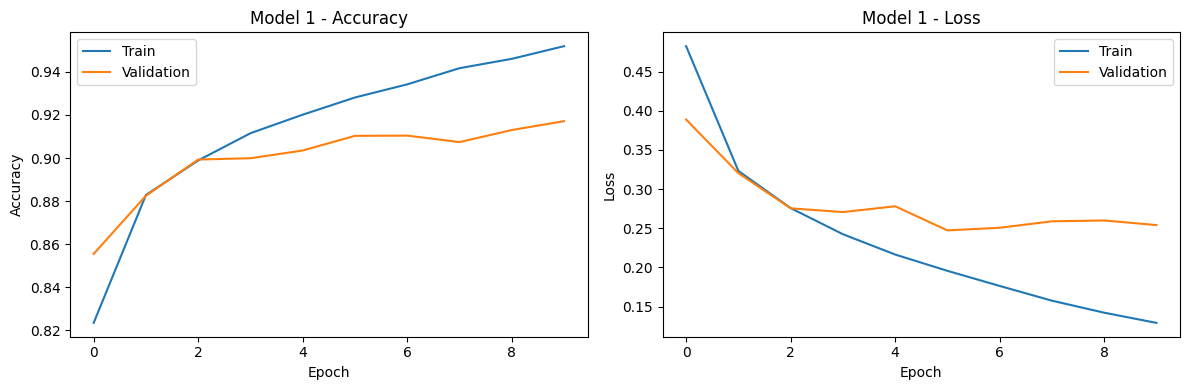

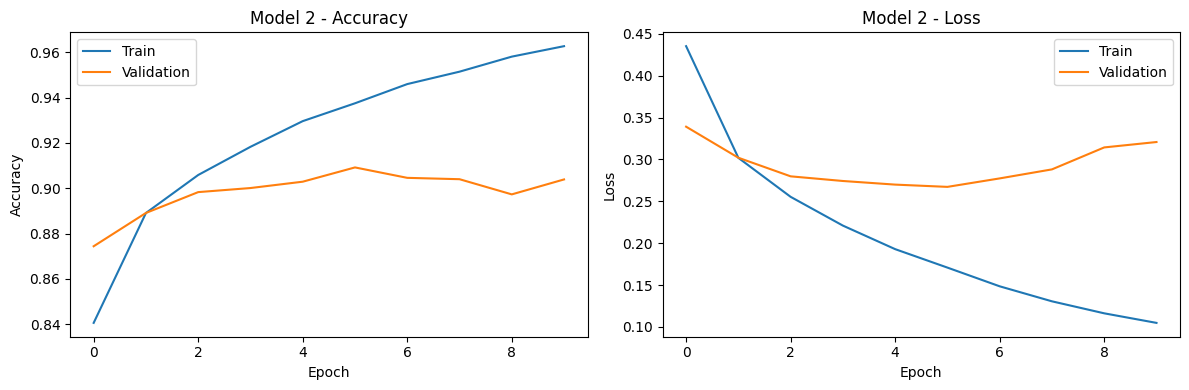

In [9]:
plot_learning_curve(history_1, 'Model 1')
plot_learning_curve(history_2, 'Model 2')

In [10]:
print("Model 1 Classification Report:")
print_classification_report(model_1, x_test, y_test)

print("\nModel 2 Classification Report:")
print_classification_report(model_2, x_test, y_test)

Model 1 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.90      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.90      0.80      0.85      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.73      0.75      0.74      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Model 2 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.89      0.

Model 1 Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


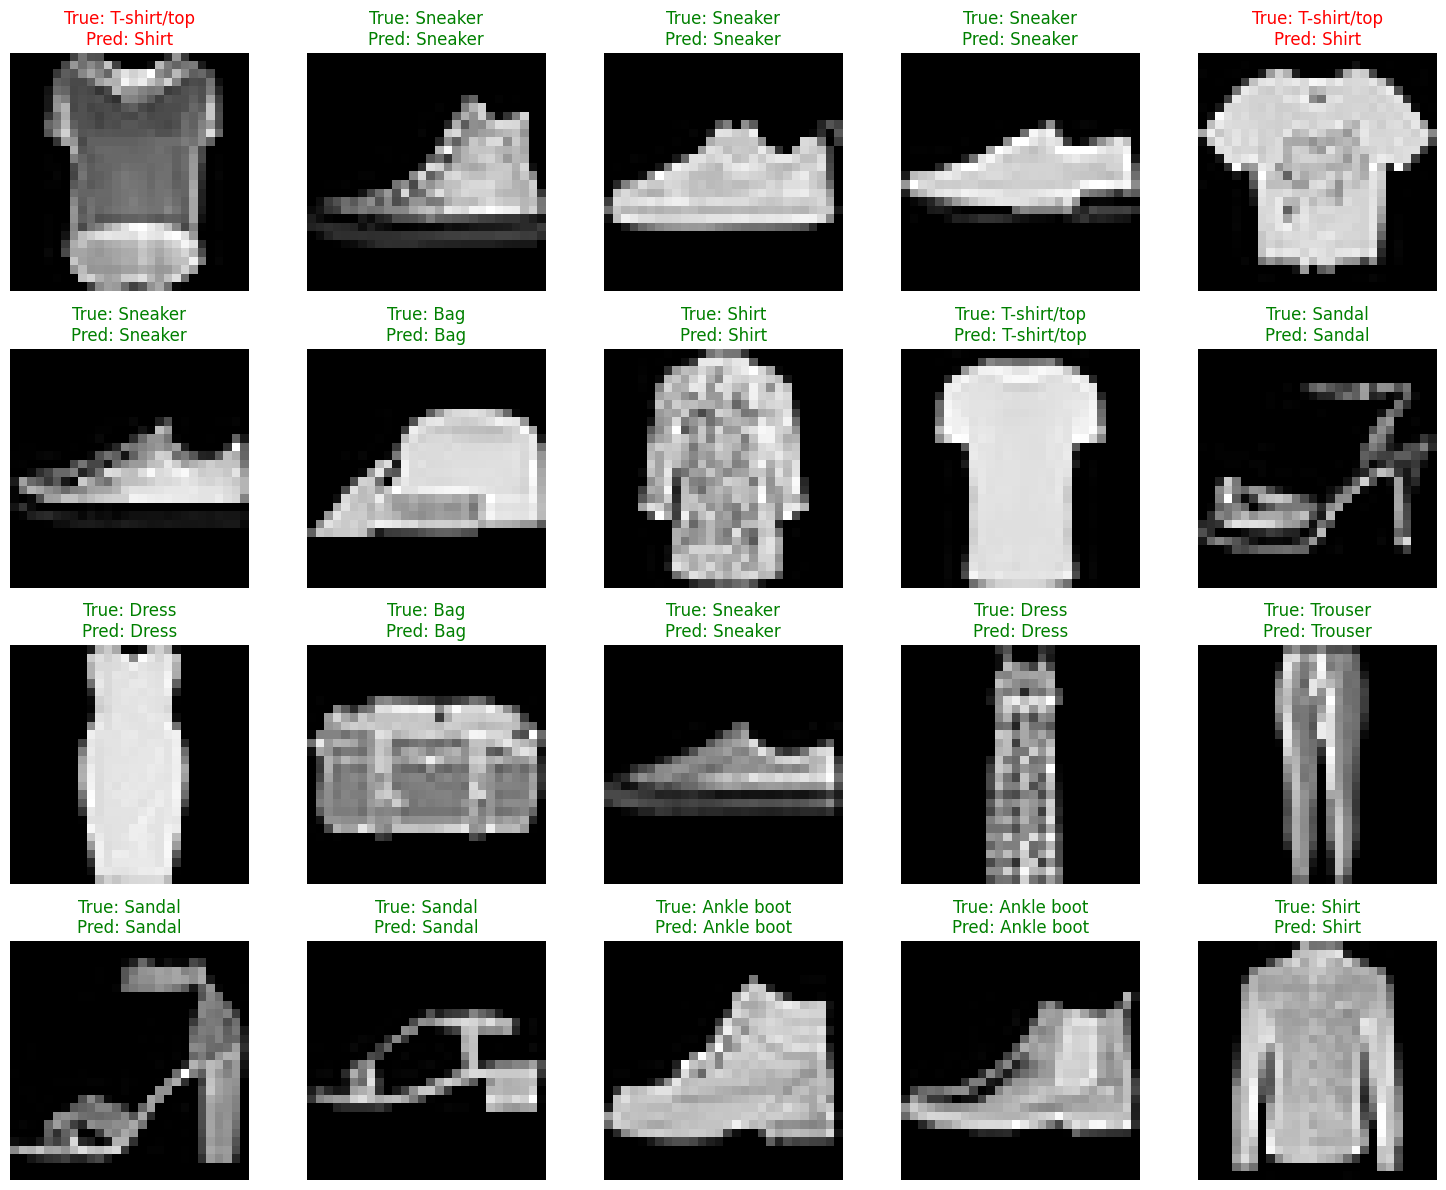

Model 2 Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


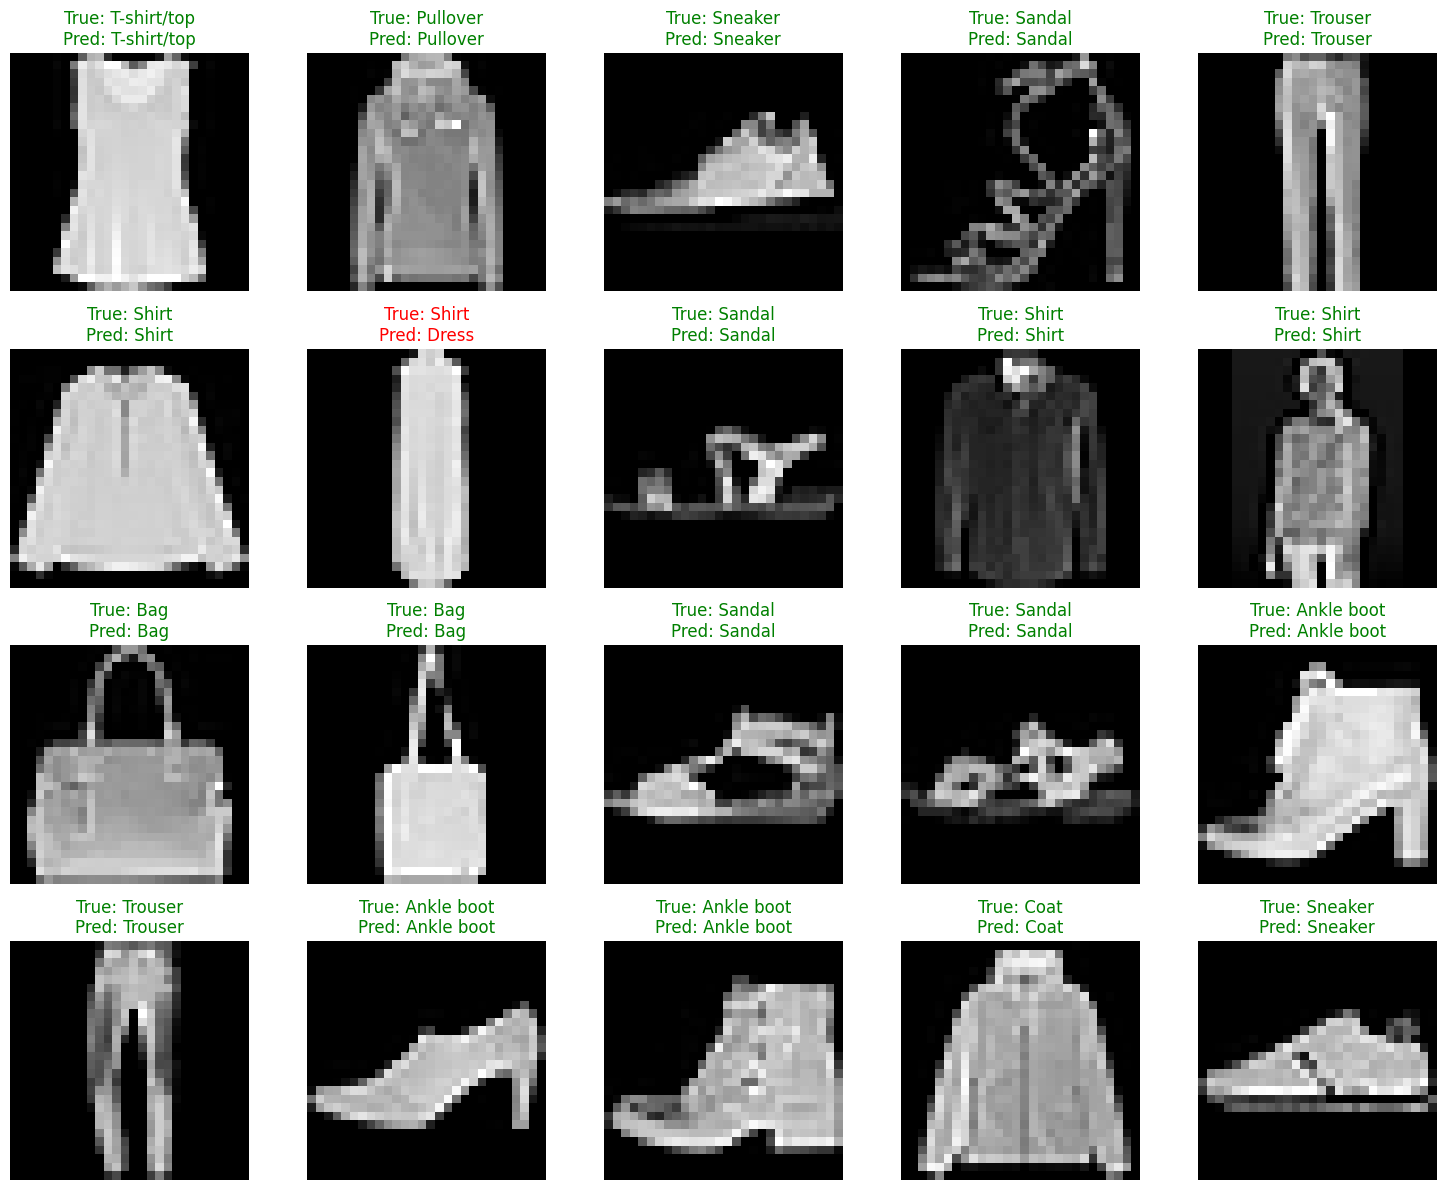

In [11]:
print("Model 1 Random Sample Classification:")
classify_random_samples(model_1, x_test, y_test)

print("Model 2 Random Sample Classification:")
classify_random_samples(model_2, x_test, y_test)

In [12]:
epochs_range = range(30, 101, 10)
batch_sizes = [32, 64, 128, 256, 512]

results_1 = []
results_2 = []

for epochs in epochs_range:
    for batch_size in batch_sizes:
        print(f"Training with epochs={epochs}, batch_size={batch_size}")
        
        model_1 = create_model_1()
        history_1 = train_model(model_1, epochs=epochs, batch_size=batch_size)
        accuracy_1 = history_1.history['val_accuracy'][-1]
        
        model_2 = create_model_2()
        history_2 = train_model(model_2, epochs=epochs, batch_size=batch_size)
        accuracy_2 = history_2.history['val_accuracy'][-1]
        
        results_1.append({'epochs': epochs, 'batch_size': batch_size, 'accuracy': accuracy_1})
        results_2.append({'epochs': epochs, 'batch_size': batch_size, 'accuracy': accuracy_2})

Training with epochs=30, batch_size=32


/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-3/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7521 - loss: 0.6833 - val_accuracy: 0.8662 - val_loss: 0.3713
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8735 - loss: 0.3498 - val_accuracy: 0.8745 - val_loss: 0.3484
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8951 - loss: 0.2878 - val_accuracy: 0.8965 - val_loss: 0.2878
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9066 - loss: 0.2532 - val_accuracy: 0.9034 - val_loss: 0.2660
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9170 - loss: 0.2286 - val_accuracy: 0.9068 - val_loss: 0.2575
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9248 - loss: 0.2028 - val_accuracy: 0.9078 - val_loss: 0.2519
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9316 - loss: 0.1836 - val_accuracy: 0.9095 - val_loss: 0.2531
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9372 -

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9726 - loss: 0.0804 - val_accuracy: 0.9115 - val_loss: 0.3137
Epoch 34/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9740 - loss: 0.0721 - val_accuracy: 0.9046 - val_loss: 0.3318
Epoch 35/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9825 - loss: 0.0518 - val_accuracy: 0.9113 - val_loss: 0.3541
Epoch 1/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.7044 - loss: 0.8317 - val_accuracy: 0.8457 - val_loss: 0.4286
Epoch 2/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.8598 - loss: 0.3929 - val_accuracy: 0.8703 - val_loss: 0.3570
Epoch 3/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.8816 - loss: 0.3276 - val_accuracy: 0.8695 - val_loss: 0.3468
Epoch 4/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.8943 - loss: 0.2928 - val_accuracy: 0.8823 - val_loss: 0.3150
Epoch 5/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.8965 - loss: 0.2906 - val_accur

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9964 - loss: 0.0188 - val_accuracy: 0.9055 - val_loss: 0.3507
Epoch 32/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9972 - loss: 0.0158 - val_accuracy: 0.9067 - val_loss: 0.3584
Epoch 33/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.9984 - loss: 0.0124 - val_accuracy: 0.9080 - val_loss: 0.3671
Epoch 34/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.9946 - loss: 0.0209 - val_accuracy: 0.9042 - val_loss: 0.3995
Epoch 37/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.9970 - loss: 0.0144 - val_accuracy: 0.9008 - val_loss: 0.4175
Epoch 38/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9930 - loss: 0.0236 - val_accuracy: 0.9023 - val_loss: 0.4235
Epoch 39/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9957 - loss: 0.0168 - val_accuracy: 0.9065 - val_loss: 0.4023
Epoch 40/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9982 - loss: 0.0092 - val_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9881 - loss: 0.0317 - val_accuracy: 0.9084 - val_loss: 0.5564
Epoch 29/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9914 - loss: 0.0245 - val_accuracy: 0.9062 - val_loss: 0.6533
Epoch 33/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9894 - loss: 0.0278 - val_accuracy: 0.9056 - val_loss: 0.6037
Epoch 34/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9916 - loss: 0.0236 - val_accuracy: 0.9011 - val_loss: 0.7135
Epoch 35/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9908 - loss: 0.0253 - val_accuracy: 0.9065 - val_loss: 0.6062
Epoch 36/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9918 - loss: 0.0246 - val_accuracy: 0.9087 - val_loss: 0.6523
Epoch 37/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9106 - val_loss: 0.6604
Epoch 38/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9933 - los

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9068 - val_loss: 0.8511
Epoch 56/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9935 - loss: 0.0184 - val_accuracy: 0.9034 - val_loss: 0.9240
Epoch 59/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.9938 - loss: 0.0189 - val_accuracy: 0.9092 - val_loss: 0.8804
Epoch 60/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9930 - loss: 0.0193 - val_accuracy: 0.9036 - val_loss: 0.8360
Epoch 1/60
 647/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.7356 - loss: 0.7558

KeyboardInterrupt: 

In [ ]:
df_1 = pd.DataFrame(results_1)
df_2 = pd.DataFrame(results_2)

pivot_1 = df_1.pivot(index='epochs', columns='batch_size', values='accuracy')
pivot_2 = df_2.pivot(index='epochs', columns='batch_size', values='accuracy')

print("Model 1 Results:")
print(pivot_1)
print("\nModel 2 Results:")
print(pivot_2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

for batch_size in batch_sizes:
    ax1.plot(pivot_1.index, pivot_1[batch_size], label=f'Batch size {batch_size}')
    ax2.plot(pivot_2.index, pivot_2[batch_size], label=f'Batch size {batch_size}')

ax1.set_title('Model 1: Accuracy vs Epochs for different Batch Sizes')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.set_title('Model 2: Accuracy vs Epochs for different Batch Sizes')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()